# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    

# Import citipy to determine the cities based on latitude and longitude


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



papatowai
waitangi
bredasdorp
grytviken
port elizabeth
tiksi
lompoc
celestun
hotan
ancud
waitangi
east honolulu
carbonear
kawambwa
waitangi
albany
kavaratti
taiohae
adamstown
bilibino
waitangi
adamstown
hotan
east london
arteche
whitehorse
taybad
aasiaat
talcahuano
mikuni
margaret river
waitangi
albany
waitangi
waitangi
san pedro pochutla
taiohae
papatowai
bredasdorp
cidreira
port-aux-francais
port lincoln
bethel
iskateley
olonkinbyen
badger
bethel
bardai
ta`u
longyearbyen
tolanaro
suva
ilulissat
lufilufi
luena
ust'-talovka
puerto real
adamstown
nova sintra
puerto real
waitangi
el calafate
abepura
waitangi
waitangi
nova sintra
vingt cinq
invercargill
vilyuchinsk
hawaiian paradise park
albany
port-aux-francais
kasongo-lunda
lazaro cardenas
amsterdam
bredasdorp
sanga-sanga
adamstown
waitangi
weno
bairnsdale
tolanaro
invercargill
cobourg
hawaiian paradise park
georgetown
san antonio oeste
whitehorse
ushuaia
kataragama
adamstown
begoro
san luis de la loma
fort mcmurray
port-aux-francais
le

ust-nera
Number of cities in the list: 592


['papatowai',
 'waitangi',
 'bredasdorp',
 'grytviken',
 'port elizabeth',
 'tiksi',
 'lompoc',
 'celestun',
 'hotan',
 'ancud',
 'east honolulu',
 'carbonear',
 'kawambwa',
 'albany',
 'kavaratti',
 'taiohae',
 'adamstown',
 'bilibino',
 'east london',
 'arteche',
 'whitehorse',
 'taybad',
 'aasiaat',
 'talcahuano',
 'mikuni',
 'margaret river',
 'san pedro pochutla',
 'cidreira',
 'port-aux-francais',
 'port lincoln',
 'bethel',
 'iskateley',
 'olonkinbyen',
 'badger',
 'bardai',
 'ta`u',
 'longyearbyen',
 'tolanaro',
 'suva',
 'ilulissat',
 'lufilufi',
 'luena',
 "ust'-talovka",
 'puerto real',
 'nova sintra',
 'el calafate',
 'abepura',
 'vingt cinq',
 'invercargill',
 'vilyuchinsk',
 'hawaiian paradise park',
 'kasongo-lunda',
 'lazaro cardenas',
 'amsterdam',
 'sanga-sanga',
 'weno',
 'bairnsdale',
 'cobourg',
 'georgetown',
 'san antonio oeste',
 'ushuaia',
 'kataragama',
 'begoro',
 'san luis de la loma',
 'fort mcmurray',
 'lebu',
 'uturoa',
 'hermanus',
 'nizhnedevitsk',
 'ko

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

    
print('url:',url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    print(i,'city:',city)
    lat=0
    lon=0
    # Create endpoint URL with each city
    
    city_url=f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
         
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print('kjgjhgy',city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"] ["temp_max"]
        city_humidity = city_weather ["main"] ["humidity"]
        city_clouds = city_weather ["clouds"] ["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
  
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

url: http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2177b8e0f931de5d451968ae863b5034
Beginning Data Retrieval     
-----------------------------
0 city: papatowai
Processing Record 1 of Set 1 | papatowai
kjgjhgy {'coord': {'lon': 169.4708, 'lat': -46.5619}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 291.08, 'feels_like': 290.34, 'temp_min': 291.08, 'temp_max': 291.08, 'pressure': 1004, 'humidity': 54, 'sea_level': 1004, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 6, 'gust': 6.26}, 'clouds': {'all': 100}, 'dt': 1698197244, 'sys': {'country': 'NZ', 'sunrise': 1698168599, 'sunset': 1698218539}, 'timezone': 46800, 'id': 2185172, 'name': 'Papatowai', 'cod': 200}
1
1 city: waitangi
Processing Record 2 of Set 1 | waitangi
kjgjhgy {'coord': {'lon': -176.5597, 'lat': -43.9535}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}

kjgjhgy {'coord': {'lon': 72.642, 'lat': 10.5669}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 301.31, 'feels_like': 303.99, 'temp_min': 301.31, 'temp_max': 301.31, 'pressure': 1012, 'humidity': 69, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 0.26, 'deg': 52, 'gust': 0.4}, 'clouds': {'all': 16}, 'dt': 1698197248, 'sys': {'country': 'IN', 'sunrise': 1698195541, 'sunset': 1698238072}, 'timezone': 19800, 'id': 1267390, 'name': 'Kavaratti', 'cod': 200}
14
15 city: taiohae
Processing Record 16 of Set 1 | taiohae
kjgjhgy {'cod': '404', 'message': 'city not found'}
City not found. Skipping...
16 city: adamstown
Processing Record 17 of Set 1 | adamstown
kjgjhgy {'coord': {'lon': -130.1015, 'lat': -25.066}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 295.81, 'feels_like': 296.19, 'temp_min': 295.81, 'te

kjgjhgy {'coord': {'lon': 70.2167, 'lat': -49.35}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 277.47, 'feels_like': 271.07, 'temp_min': 277.47, 'temp_max': 277.47, 'pressure': 1012, 'humidity': 92, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 13.14, 'deg': 302, 'gust': 17.78}, 'clouds': {'all': 100}, 'dt': 1698197251, 'sys': {'country': 'TF', 'sunrise': 1698192049, 'sunset': 1698242728}, 'timezone': 18000, 'id': 1546102, 'name': 'Port-aux-Français', 'cod': 200}
27
29 city: port lincoln
Processing Record 30 of Set 1 | port lincoln
kjgjhgy {'coord': {'lon': 135.8667, 'lat': -34.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 286.57, 'feels_like': 285.12, 'temp_min': 286.57, 'temp_max': 286.57, 'pressure': 1028, 'humidity': 44, 'sea_level': 1028, 'grnd_level': 1026}, 'visibility': 100

kjgjhgy {'coord': {'lon': 81.85, 'lat': 50.5493}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 276.67, 'feels_like': 272.37, 'temp_min': 276.67, 'temp_max': 276.67, 'pressure': 1023, 'humidity': 60, 'sea_level': 1023, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 5.54, 'deg': 161, 'gust': 14.84}, 'clouds': {'all': 94}, 'dt': 1698197255, 'sys': {'country': 'KZ', 'sunrise': 1698196230, 'sunset': 1698232963}, 'timezone': 21600, 'id': 1517610, 'name': "Ūst'-Talovka", 'cod': 200}
41
43 city: puerto real
Processing Record 44 of Set 1 | puerto real
kjgjhgy {'coord': {'lon': -6.1901, 'lat': 36.5282}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.63, 'feels_like': 293.8, 'temp_min': 291.82, 'temp_max': 293.85, 'pressure': 1018, 'humidity': 79, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': 

kjgjhgy {'coord': {'lon': 10.9667, 'lat': 50.2667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.14, 'feels_like': 280.43, 'temp_min': 280.23, 'temp_max': 283.41, 'pressure': 1005, 'humidity': 96}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 264, 'gust': 2.6}, 'clouds': {'all': 78}, 'dt': 1698197131, 'sys': {'type': 2, 'id': 2001002, 'country': 'DE', 'sunrise': 1698213228, 'sunset': 1698249987}, 'timezone': 7200, 'id': 2939951, 'name': 'Coburg', 'cod': 200}
55
58 city: georgetown
Processing Record 8 of Set 2 | georgetown
kjgjhgy {'coord': {'lon': 100.3354, 'lat': 5.4112}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 299.96, 'feels_like': 302.99, 'temp_min': 299.79, 'temp_max': 301.45, 'pressure': 1013, 'humidity': 86}, 'visibility': 9000, 'wind': {'speed': 2.24, 'deg': 90, 'gust': 0}, 'clouds': {'all': 20}, 'dt': 

kjgjhgy {'coord': {'lon': 13.84, 'lat': -18.0607}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 294.49, 'feels_like': 293.49, 'temp_min': 294.49, 'temp_max': 294.49, 'pressure': 1009, 'humidity': 31, 'sea_level': 1009, 'grnd_level': 885}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 246, 'gust': 1.88}, 'clouds': {'all': 10}, 'dt': 1698197262, 'sys': {'country': 'NA', 'sunrise': 1698208151, 'sunset': 1698253684}, 'timezone': 7200, 'id': 3354077, 'name': 'Opuwo', 'cod': 200}
68
72 city: happy valley-goose bay
Processing Record 22 of Set 2 | happy valley-goose bay
kjgjhgy {'coord': {'lon': -60.3315, 'lat': 53.3168}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.32, 'feels_like': 275.15, 'temp_min': 278.32, 'temp_max': 278.32, 'pressure': 1013, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 230}, 'cl

kjgjhgy {'coord': {'lon': -7.5692, 'lat': 9.51}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.06, 'feels_like': 297.73, 'temp_min': 297.06, 'temp_max': 297.06, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 965}, 'visibility': 10000, 'wind': {'speed': 1.74, 'deg': 187, 'gust': 3.95}, 'clouds': {'all': 100}, 'dt': 1698197266, 'sys': {'country': 'CI', 'sunrise': 1698214738, 'sunset': 1698257373}, 'timezone': 0, 'id': 2283016, 'name': 'Odienné', 'cod': 200}
82
86 city: sulak
Processing Record 36 of Set 2 | sulak
kjgjhgy {'coord': {'lon': 47.5146, 'lat': 43.2734}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291, 'feels_like': 290.75, 'temp_min': 291, 'temp_max': 291, 'pressure': 1015, 'humidity': 73, 'sea_level': 1015, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 6.13, 'deg': 305, 'g

kjgjhgy {'coord': {'lon': 28.3955, 'lat': 4.5721}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.38, 'feels_like': 293.94, 'temp_min': 293.38, 'temp_max': 293.38, 'pressure': 1009, 'humidity': 95, 'sea_level': 1009, 'grnd_level': 935}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 186, 'gust': 1.15}, 'clouds': {'all': 100}, 'dt': 1698197269, 'sys': {'country': 'SS', 'sunrise': 1698205853, 'sunset': 1698248996}, 'timezone': 7200, 'id': 363656, 'name': 'Yambio', 'cod': 200}
95
100 city: utrik
Processing Record 0 of Set 3 | utrik
kjgjhgy {'coord': {'lon': 169.8474, 'lat': 11.2278}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.89, 'feels_like': 304.2, 'temp_min': 300.89, 'temp_max': 300.89, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 5.76, 'd

kjgjhgy {'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 275.62, 'feels_like': 271.89, 'temp_min': 275.62, 'temp_max': 278.48, 'pressure': 1015, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 299, 'gust': 4.92}, 'clouds': {'all': 75}, 'dt': 1698197273, 'sys': {'type': 2, 'id': 2088272, 'country': 'RU', 'sunrise': 1698178097, 'sunset': 1698214236}, 'timezone': 43200, 'id': 2122104, 'name': 'Petropavlovsk-Kamchatskiy', 'cod': 200}
109
116 city: dhrangadhra
Processing Record 16 of Set 3 | dhrangadhra
kjgjhgy {'coord': {'lon': 71.4667, 'lat': 22.9833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.97, 'feels_like': 298.73, 'temp_min': 298.97, 'temp_max': 298.97, 'pressure': 1014, 'humidity': 43, 'sea_level': 1014, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'s

kjgjhgy {'coord': {'lon': -1.7554, 'lat': 4.8845}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.04, 'feels_like': 298.96, 'temp_min': 298.04, 'temp_max': 298.04, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.69, 'deg': 255, 'gust': 5.91}, 'clouds': {'all': 89}, 'dt': 1698197276, 'sys': {'country': 'GH', 'sunrise': 1698213105, 'sunset': 1698256215}, 'timezone': 0, 'id': 2294915, 'name': 'Takoradze', 'cod': 200}
123
130 city: luderitz
Processing Record 30 of Set 3 | luderitz
kjgjhgy {'coord': {'lon': 15.1594, 'lat': -26.6481}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 290.42, 'feels_like': 289.9, 'temp_min': 290.42, 'temp_max': 290.42, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 7.8, '

kjgjhgy {'coord': {'lon': 117.7016, 'lat': 9.0629}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.81, 'feels_like': 306.94, 'temp_min': 302.81, 'temp_max': 302.81, 'pressure': 1013, 'humidity': 68, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 0.43, 'deg': 185, 'gust': 0.97}, 'clouds': {'all': 89}, 'dt': 1698197000, 'sys': {'country': 'PH', 'sunrise': 1698184648, 'sunset': 1698227338}, 'timezone': 28800, 'id': 1713839, 'name': 'Eraan', 'cod': 200}
137
144 city: iqaluit
Processing Record 44 of Set 3 | iqaluit
kjgjhgy {'coord': {'lon': -68.5145, 'lat': 63.7506}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 272.98, 'feels_like': 268.95, 'temp_min': 272.98, 'temp_max': 273, 'pressure': 999, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1

kjgjhgy {'coord': {'lon': -51.1817, 'lat': -0.0583}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 302.25, 'feels_like': 306.89, 'temp_min': 302.25, 'temp_max': 302.25, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1698197282, 'sys': {'type': 1, 'id': 8415, 'country': 'BR', 'sunrise': 1698138322, 'sunset': 1698181935}, 'timezone': -10800, 'id': 3391360, 'name': 'Santana', 'cod': 200}
150
157 city: waingapu
Processing Record 7 of Set 4 | waingapu
kjgjhgy {'coord': {'lon': 120.2641, 'lat': -9.6567}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 303.39, 'feels_like': 305.26, 'temp_min': 303.39, 'temp_max': 303.39, 'pressure': 1015, 'humidity': 54, 'sea_level': 1015, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.55, 'deg': 78, 'gust': 

kjgjhgy {'coord': {'lon': 16.4009, 'lat': 38.322}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.28, 'feels_like': 295.45, 'temp_min': 295.28, 'temp_max': 295.28, 'pressure': 1013, 'humidity': 73, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.7, 'deg': 302, 'gust': 3.5}, 'clouds': {'all': 100}, 'dt': 1698197285, 'sys': {'country': 'IT', 'sunrise': 1698210756, 'sunset': 1698249850}, 'timezone': 7200, 'id': 2523595, 'name': 'Roccella Ionica', 'cod': 200}
163
171 city: atafu village
Processing Record 21 of Set 4 | atafu village
kjgjhgy {'coord': {'lon': -172.5159, 'lat': -8.5421}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.9, 'feels_like': 306.05, 'temp_min': 301.9, 'temp_max': 301.9, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'w

kjgjhgy {'coord': {'lon': -70.9167, 'lat': -53.15}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 278.21, 'feels_like': 272.88, 'temp_min': 278.21, 'temp_max': 278.21, 'pressure': 1001, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 9.77, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1698196991, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1698139057, 'sunset': 1698190672}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
176
185 city: port macquarie
Processing Record 35 of Set 4 | port macquarie
kjgjhgy {'coord': {'lon': 152.9167, 'lat': -31.4333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 304.44, 'feels_like': 304.29, 'temp_min': 304.44, 'temp_max': 304.44, 'pressure': 1008, 'humidity': 39, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 4

kjgjhgy {'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.18, 'feels_like': 298.12, 'temp_min': 298.18, 'temp_max': 298.18, 'pressure': 1016, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1698197292, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1698163254, 'sunset': 1698209124}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
190
201 city: champerico
Processing Record 1 of Set 5 | champerico
kjgjhgy {'coord': {'lon': -91.9167, 'lat': 14.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.66, 'feels_like': 299.66, 'temp_min': 299.66, 'temp_max': 299.66, 'pressure': 1009, 'humidity': 79, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.24, 'deg': 318, 'gust': 4.

kjgjhgy {'cod': '404', 'message': 'city not found'}
City not found. Skipping...
215 city: mejit
Processing Record 15 of Set 5 | mejit
kjgjhgy {'coord': {'lon': 170.8646, 'lat': 10.2753}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 301.05, 'feels_like': 304.85, 'temp_min': 301.05, 'temp_max': 301.05, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.6, 'deg': 77, 'gust': 5.55}, 'clouds': {'all': 43}, 'dt': 1698197296, 'sys': {'country': 'MH', 'sunrise': 1698171950, 'sunset': 1698214520}, 'timezone': 43200, 'id': 7306523, 'name': 'Mejit', 'cod': 200}
203
216 city: sretensk
Processing Record 16 of Set 5 | sretensk
kjgjhgy {'coord': {'lon': 117.7093, 'lat': 52.2453}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 275.48, 'feels_like': 270.15, 'temp_min': 275.

kjgjhgy {'coord': {'lon': -112.0518, 'lat': 53.5001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 265.43, 'feels_like': 260.28, 'temp_min': 262.12, 'temp_max': 266.54, 'pressure': 1028, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 320}, 'clouds': {'all': 100}, 'dt': 1698197252, 'sys': {'type': 1, 'id': 530, 'country': 'CA', 'sunrise': 1698156699, 'sunset': 1698192773}, 'timezone': -21600, 'id': 6173635, 'name': 'Vegreville', 'cod': 200}
217
231 city: zorritos
Processing Record 31 of Set 5 | zorritos
kjgjhgy {'coord': {'lon': -80.6782, 'lat': -3.6805}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.31, 'feels_like': 297.84, 'temp_min': 297.31, 'temp_max': 297.31, 'pressure': 1010, 'humidity': 79, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.57, 'deg': 244, '

kjgjhgy {'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.98, 'feels_like': 298.53, 'temp_min': 297.98, 'temp_max': 297.98, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.44, 'deg': 93, 'gust': 7.05}, 'clouds': {'all': 76}, 'dt': 1698197302, 'sys': {'country': 'BR', 'sunrise': 1698134293, 'sunset': 1698178419}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
230
244 city: kentville
Processing Record 44 of Set 5 | kentville
kjgjhgy {'coord': {'lon': -64.4988, 'lat': 45.0835}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.18, 'feels_like': 279.59, 'temp_min': 280.91, 'temp_max': 281.32, 'pressure': 1025, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 220}, 'clouds': {'all':

kjgjhgy {'coord': {'lon': -111.0386, 'lat': 45.6796}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 276.65, 'feels_like': 273.09, 'temp_min': 274.83, 'temp_max': 277.53, 'pressure': 1008, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1698197305, 'sys': {'type': 2, 'id': 2012531, 'country': 'US', 'sunrise': 1698155547, 'sunset': 1698193439}, 'timezone': -21600, 'id': 5641727, 'name': 'Bozeman', 'cod': 200}
243
257 city: chonchi
Processing Record 7 of Set 6 | chonchi
kjgjhgy {'coord': {'lon': -73.8092, 'lat': -42.6128}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 282.1, 'feels_like': 281.45, 'temp_min': 282.1, 'temp_max': 282.71, 'pressure': 1026, 'humidity': 95, 'sea_level': 1026, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 1.64, 'deg': 242, 'gust': 3.96},

kjgjhgy {'coord': {'lon': 21.5667, 'lat': -4.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.9, 'feels_like': 293.52, 'temp_min': 292.9, 'temp_max': 292.9, 'pressure': 1010, 'humidity': 99, 'sea_level': 1010, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 0.4, 'deg': 280, 'gust': 0.44}, 'clouds': {'all': 100}, 'dt': 1698197308, 'sys': {'country': 'CD', 'sunrise': 1698207012, 'sunset': 1698251115}, 'timezone': 7200, 'id': 207596, 'name': 'Mweka', 'cod': 200}
256
270 city: tuscumbia
Processing Record 20 of Set 6 | tuscumbia
kjgjhgy {'coord': {'lon': -87.7025, 'lat': 34.7312}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.7, 'feels_like': 291.07, 'temp_min': 290.24, 'temp_max': 292.29, 'pressure': 1023, 'humidity': 56}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 169

kjgjhgy {'coord': {'lon': 97.0333, 'lat': 20.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 290.37, 'feels_like': 290.6, 'temp_min': 290.37, 'temp_max': 290.37, 'pressure': 1017, 'humidity': 94, 'sea_level': 1017, 'grnd_level': 864}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 132, 'gust': 1.29}, 'clouds': {'all': 100}, 'dt': 1698197311, 'sys': {'country': 'MM', 'sunrise': 1698190235, 'sunset': 1698231671}, 'timezone': 23400, 'id': 1293960, 'name': 'Taunggyi', 'cod': 200}
270
284 city: ghadamis
Processing Record 34 of Set 6 | ghadamis
kjgjhgy {'coord': {'lon': 9.5007, 'lat': 30.1337}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 301.4, 'feels_like': 300, 'temp_min': 301.4, 'temp_max': 301.4, 'pressure': 1013, 'humidity': 17, 'sea_level': 1013, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 5.29

kjgjhgy {'coord': {'lon': -22.5624, 'lat': 64.0049}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 279.39, 'feels_like': 275.97, 'temp_min': 279.1, 'temp_max': 279.39, 'pressure': 1004, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1698197314, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1698223749, 'sunset': 1698255558}, 'timezone': 0, 'id': 3415496, 'name': 'Keflavik', 'cod': 200}
283
298 city: santa elena de uairen
Processing Record 48 of Set 6 | santa elena de uairen
kjgjhgy {'coord': {'lon': -61.1333, 'lat': 4.6167}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 294.52, 'feels_like': 295.04, 'temp_min': 294.52, 'temp_max': 294.52, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 909}, 'visibility': 7262, 'wind': {'speed': 1.89, 'deg': 3

kjgjhgy {'coord': {'lon': 120.124, 'lat': 13.8584}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.06, 'feels_like': 305.17, 'temp_min': 301.06, 'temp_max': 301.06, 'pressure': 1013, 'humidity': 81, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.22, 'deg': 82, 'gust': 7}, 'clouds': {'all': 100}, 'dt': 1698197318, 'sys': {'country': 'PH', 'sunrise': 1698184315, 'sunset': 1698226508}, 'timezone': 28800, 'id': 1705448, 'name': 'Lubang', 'cod': 200}
296
312 city: anadyr
Processing Record 12 of Set 7 | anadyr
kjgjhgy {'coord': {'lon': 177.4833, 'lat': 64.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 275.93, 'feels_like': 272.28, 'temp_min': 275.93, 'temp_max': 276.43, 'pressure': 1019, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 90}, 'clouds': {'all': 40}, 'dt':

kjgjhgy {'coord': {'lon': -23.6167, 'lat': 14.9167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.41, 'feels_like': 299.41, 'temp_min': 299.41, 'temp_max': 299.41, 'pressure': 1014, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1698197320, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1698218875, 'sunset': 1698260938}, 'timezone': -3600, 'id': 3374725, 'name': 'Cidade Velha', 'cod': 200}
309
325 city: spittal an der drau
Processing Record 25 of Set 7 | spittal an der drau
kjgjhgy {'coord': {'lon': 13.5, 'lat': 46.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 286.73, 'feels_like': 286.62, 'temp_min': 286.73, 'temp_max': 286.73, 'pressure': 1005, 'humidity': 95, 'sea_level': 1005, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg':

kjgjhgy {'coord': {'lon': -34.8086, 'lat': -7.4706}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.48, 'feels_like': 299.08, 'temp_min': 298.48, 'temp_max': 298.48, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.75, 'deg': 62, 'gust': 4.44}, 'clouds': {'all': 6}, 'dt': 1698197324, 'sys': {'type': 1, 'id': 8391, 'country': 'BR', 'sunrise': 1698134021, 'sunset': 1698178377}, 'timezone': -10800, 'id': 3391889, 'name': 'Pitimbu', 'cod': 200}
322
340 city: jwaneng
Processing Record 40 of Set 7 | jwaneng
kjgjhgy {'coord': {'lon': 24.7303, 'lat': -24.6004}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.43, 'feels_like': 289.6, 'temp_min': 291.43, 'temp_max': 291.43, 'pressure': 1012, 'humidity': 11, 'sea_level': 1012, 'grnd_level': 881}, 'visibility': 10000, 'wind': 

kjgjhgy {'coord': {'lon': 28.9349, 'lat': -18.2048}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.91, 'feels_like': 294.58, 'temp_min': 294.91, 'temp_max': 294.91, 'pressure': 1010, 'humidity': 55, 'sea_level': 1010, 'grnd_level': 877}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 138, 'gust': 2.03}, 'clouds': {'all': 100}, 'dt': 1698197327, 'sys': {'country': 'ZW', 'sunrise': 1698204521, 'sunset': 1698250069}, 'timezone': 7200, 'id': 890983, 'name': 'Gokwe', 'cod': 200}
335
353 city: buka
Processing Record 3 of Set 8 | buka
kjgjhgy {'coord': {'lon': 69.1986, 'lat': 40.8108}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.68, 'feels_like': 284.27, 'temp_min': 285.68, 'temp_max': 285.68, 'pressure': 1016, 'humidity': 49, 'sea_level': 1016, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 0.4, 'deg': 113,

kjgjhgy {'coord': {'lon': -101.865, 'lat': 54.7682}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 269.73, 'feels_like': 265.68, 'temp_min': 269.73, 'temp_max': 269.73, 'pressure': 1022, 'humidity': 56, 'sea_level': 1022, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 276, 'gust': 7.91}, 'clouds': {'all': 96}, 'dt': 1698197078, 'sys': {'country': 'CA', 'sunrise': 1698154431, 'sunset': 1698190152}, 'timezone': -18000, 'id': 5954718, 'name': 'Flin Flon', 'cod': 200}
349
368 city: poronaysk
Processing Record 18 of Set 8 | poronaysk
kjgjhgy {'coord': {'lon': 143.1167, 'lat': 49.2167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 282.34, 'feels_like': 279.55, 'temp_min': 282.34, 'temp_max': 282.34, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'

kjgjhgy {'coord': {'lon': -70.7656, 'lat': -8.1614}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 300.54, 'feels_like': 301.83, 'temp_min': 300.54, 'temp_max': 300.54, 'pressure': 1006, 'humidity': 61, 'sea_level': 1006, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 0.98, 'deg': 19, 'gust': 1.03}, 'clouds': {'all': 57}, 'dt': 1698197057, 'sys': {'country': 'BR', 'sunrise': 1698142614, 'sunset': 1698187043}, 'timezone': -18000, 'id': 3661980, 'name': 'Tarauacá', 'cod': 200}
363
383 city: tagiura
Processing Record 33 of Set 8 | tagiura
kjgjhgy {'coord': {'lon': 13.3506, 'lat': 32.8817}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.69, 'feels_like': 299.69, 'temp_min': 299.69, 'temp_max': 299.69, 'pressure': 1013, 'humidity': 46, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed'

kjgjhgy {'coord': {'lon': -35.4789, 'lat': -6.3106}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.27, 'feels_like': 295.81, 'temp_min': 295.27, 'temp_max': 295.27, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 111, 'gust': 5.81}, 'clouds': {'all': 86}, 'dt': 1698197337, 'sys': {'country': 'BR', 'sunrise': 1698134241, 'sunset': 1698178479}, 'timezone': -10800, 'id': 3389134, 'name': 'Santo Antônio', 'cod': 200}
376
396 city: olonets
Processing Record 46 of Set 8 | olonets
kjgjhgy {'coord': {'lon': 32.9698, 'lat': 60.9847}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 270.13, 'feels_like': 267.71, 'temp_min': 270.13, 'temp_max': 270.13, 'pressure': 1020, 'humidity': 87, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed

kjgjhgy {'coord': {'lon': 176.1667, 'lat': -37.6861}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 294.75, 'feels_like': 294.69, 'temp_min': 292.95, 'temp_max': 294.79, 'pressure': 1018, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 250, 'gust': 6.26}, 'clouds': {'all': 18}, 'dt': 1698197340, 'sys': {'type': 2, 'id': 2006399, 'country': 'NZ', 'sunrise': 1698167869, 'sunset': 1698216056}, 'timezone': 46800, 'id': 2208032, 'name': 'Tauranga', 'cod': 200}
389
411 city: praia da vitoria
Processing Record 11 of Set 9 | praia da vitoria
kjgjhgy {'coord': {'lon': -27.0667, 'lat': 38.7333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 295.29, 'feels_like': 295.86, 'temp_min': 294.13, 'temp_max': 295.29, 'pressure': 1016, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 6.21, 'deg': 239, 'gust': 9.77}, 'clou

kjgjhgy {'coord': {'lon': 64.6311, 'lat': 52.4503}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 279.66, 'feels_like': 274.78, 'temp_min': 279.66, 'temp_max': 279.66, 'pressure': 1001, 'humidity': 85, 'sea_level': 1001, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 9.84, 'deg': 201, 'gust': 16.03}, 'rain': {'1h': 0.62}, 'clouds': {'all': 100}, 'dt': 1698197344, 'sys': {'country': 'KZ', 'sunrise': 1698200610, 'sunset': 1698236848}, 'timezone': 21600, 'id': 1519924, 'name': 'Kushmurun', 'cod': 200}
402
425 city: tranovaho
Processing Record 25 of Set 9 | tranovaho
kjgjhgy {'cod': '404', 'message': 'city not found'}
City not found. Skipping...
426 city: dhidhdhoo
Processing Record 26 of Set 9 | dhidhdhoo
kjgjhgy {'coord': {'lon': 73.1, 'lat': 6.8833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 301.18, 'feels_like': 3

kjgjhgy {'coord': {'lon': 17.4695, 'lat': 4.3189}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.29, 'feels_like': 294.97, 'temp_min': 294.29, 'temp_max': 294.29, 'pressure': 1009, 'humidity': 96, 'sea_level': 1009, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 0.12, 'deg': 12, 'gust': 0.31}, 'clouds': {'all': 99}, 'dt': 1698197348, 'sys': {'country': 'CF', 'sunrise': 1698208463, 'sunset': 1698251631}, 'timezone': 3600, 'id': 2388614, 'name': 'Boda', 'cod': 200}
415
440 city: sinabang
Processing Record 40 of Set 9 | sinabang
kjgjhgy {'coord': {'lon': 96.3801, 'lat': 2.4803}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.47, 'feels_like': 299.3, 'temp_min': 298.47, 'temp_max': 298.47, 'pressure': 1014, 'humidity': 86, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 0.76,

kjgjhgy {'coord': {'lon': 72.9667, 'lat': 3.7833}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 300.74, 'feels_like': 303.99, 'temp_min': 300.74, 'temp_max': 300.74, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.77, 'deg': 132, 'gust': 6.14}, 'rain': {'1h': 14.96}, 'clouds': {'all': 100}, 'dt': 1698197351, 'sys': {'country': 'MV', 'sunrise': 1698195116, 'sunset': 1698238341}, 'timezone': 18000, 'id': 1337605, 'name': 'Mahibadhoo', 'cod': 200}
428
454 city: dolores
Processing Record 4 of Set 10 | dolores
kjgjhgy {'coord': {'lon': -57.6792, 'lat': -36.3132}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 281.51, 'feels_like': 279.43, 'temp_min': 281.51, 'temp_max': 281.51, 'pressure': 1018, 'humidity': 88, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility':

kjgjhgy {'coord': {'lon': -6.589, 'lat': 62.2266}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 281.66, 'feels_like': 277.83, 'temp_min': 281.66, 'temp_max': 281.66, 'pressure': 1008, 'humidity': 93, 'sea_level': 1008, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 8.19, 'deg': 119, 'gust': 9.7}, 'rain': {'1h': 0.14}, 'clouds': {'all': 84}, 'dt': 1698197355, 'sys': {'type': 1, 'id': 1596, 'country': 'FO', 'sunrise': 1698219456, 'sunset': 1698252184}, 'timezone': 3600, 'id': 2618795, 'name': 'Klaksvík', 'cod': 200}
441
468 city: yekaterinoslavka
Processing Record 18 of Set 10 | yekaterinoslavka
kjgjhgy {'coord': {'lon': 129.1139, 'lat': 50.3734}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 278.14, 'feels_like': 275.56, 'temp_min': 278.14, 'temp_max': 278.14, 'pressure': 1014, 'humidity': 51, 'sea_level': 1014, 'grn

kjgjhgy {'coord': {'lon': 23.7162, 'lat': 37.9795}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.87, 'feels_like': 293.14, 'temp_min': 289.36, 'temp_max': 295, 'pressure': 1012, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 91, 'gust': 1.79}, 'clouds': {'all': 66}, 'dt': 1698197359, 'sys': {'type': 2, 'id': 2005332, 'country': 'GR', 'sunrise': 1698208972, 'sunset': 1698248124}, 'timezone': 10800, 'id': 264371, 'name': 'Athens', 'cod': 200}
454
481 city: susuman
Processing Record 31 of Set 10 | susuman
kjgjhgy {'coord': {'lon': 148.1667, 'lat': 62.7833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 259.81, 'feels_like': 259.81, 'temp_min': 259.81, 'temp_max': 259.81, 'pressure': 1016, 'humidity': 92}, 'visibility': 5463, 'wind': {'speed': 0.89, 'deg': 250, 'gust': 0.45}, 'clouds': {'all': 94}, '

kjgjhgy {'coord': {'lon': 59.2106, 'lat': 53.8769}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 279.63, 'feels_like': 276.41, 'temp_min': 279.63, 'temp_max': 279.63, 'pressure': 993, 'humidity': 96, 'sea_level': 993, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 4.84, 'deg': 216, 'gust': 10.18}, 'rain': {'1h': 0.74}, 'clouds': {'all': 100}, 'dt': 1698197362, 'sys': {'country': 'RU', 'sunrise': 1698202109, 'sunset': 1698237950}, 'timezone': 18000, 'id': 475463, 'name': "Verkhneural'sk", 'cod': 200}
468
495 city: revda
Processing Record 45 of Set 10 | revda
kjgjhgy {'coord': {'lon': 59.9303, 'lat': 56.801}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 269.23, 'feels_like': 264.73, 'temp_min': 269.23, 'temp_max': 269.23, 'pressure': 1002, 'humidity': 88, 'sea_level': 1002, 'grnd_level': 964}, 'visibility': 10000, '

kjgjhgy {'coord': {'lon': 81.8167, 'lat': 7.4167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 298.46, 'feels_like': 299.27, 'temp_min': 298.46, 'temp_max': 298.46, 'pressure': 1013, 'humidity': 85, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.67, 'deg': 206, 'gust': 3.26}, 'clouds': {'all': 20}, 'dt': 1698197365, 'sys': {'country': 'LK', 'sunrise': 1698193177, 'sunset': 1698236032}, 'timezone': 19800, 'id': 1242110, 'name': 'Kalmunai', 'cod': 200}
481
509 city: banjar
Processing Record 9 of Set 11 | banjar
kjgjhgy {'coord': {'lon': 114.9675, 'lat': -8.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 303.68, 'feels_like': 307.72, 'temp_min': 303.68, 'temp_max': 303.68, 'pressure': 1015, 'humidity': 63, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 0.71,

kjgjhgy {'coord': {'lon': 14.368, 'lat': 41.3508}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 291.08, 'feels_like': 290.97, 'temp_min': 291.08, 'temp_max': 291.18, 'pressure': 1010, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 6.16, 'deg': 230, 'gust': 13.57}, 'clouds': {'all': 100}, 'dt': 1698197368, 'sys': {'type': 2, 'id': 2006941, 'country': 'IT', 'sunrise': 1698211497, 'sunset': 1698250085}, 'timezone': 7200, 'id': 6542350, 'name': 'Piedimonte Matese', 'cod': 200}
494
522 city: labrador city
Processing Record 22 of Set 11 | labrador city
kjgjhgy {'coord': {'lon': -66.9114, 'lat': 52.9463}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 275.1, 'feels_like': 271.19, 'temp_min': 275.1, 'temp_max': 275.1, 'pressure': 1013, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 240}, 'clouds': 

kjgjhgy {'coord': {'lon': 135.7, 'lat': 51.6667}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 278.93, 'feels_like': 278.93, 'temp_min': 278.93, 'temp_max': 278.93, 'pressure': 1015, 'humidity': 51, 'sea_level': 1015, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 0.91, 'deg': 171, 'gust': 1.11}, 'clouds': {'all': 21}, 'dt': 1698197371, 'sys': {'country': 'RU', 'sunrise': 1698183430, 'sunset': 1698219917}, 'timezone': 36000, 'id': 2026786, 'name': 'Berezovyy', 'cod': 200}
507
535 city: charters towers
Processing Record 35 of Set 11 | charters towers
kjgjhgy {'coord': {'lon': 146.2667, 'lat': -20.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 305.05, 'feels_like': 303.74, 'temp_min': 305.05, 'temp_max': 305.05, 'pressure': 1014, 'humidity': 29, 'sea_level': 1014, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'spee

kjgjhgy {'coord': {'lon': 53.087, 'lat': 67.6713}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 268.21, 'feels_like': 262.43, 'temp_min': 268.21, 'temp_max': 268.21, 'pressure': 1001, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 333, 'gust': 9.39}, 'clouds': {'all': 94}, 'dt': 1698197374, 'sys': {'type': 2, 'id': 2087988, 'country': 'RU', 'sunrise': 1698206717, 'sunset': 1698236281}, 'timezone': 10800, 'id': 523392, 'name': 'Naryan-Mar', 'cod': 200}
520
548 city: vila franca do campo
Processing Record 48 of Set 11 | vila franca do campo
kjgjhgy {'coord': {'lon': -25.4333, 'lat': 37.7167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 294.38, 'feels_like': 294.93, 'temp_min': 294.38, 'temp_max': 294.38, 'pressure': 1019, 'humidity': 91, 'sea_level': 1019, 'grnd_level': 1016}, 'visibility': 10000, 

kjgjhgy {'coord': {'lon': 72.3667, 'lat': 27.1333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.24, 'feels_like': 297.74, 'temp_min': 298.24, 'temp_max': 298.24, 'pressure': 1015, 'humidity': 36, 'sea_level': 1015, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 3.31, 'deg': 141, 'gust': 3.69}, 'clouds': {'all': 9}, 'dt': 1698197378, 'sys': {'country': 'IN', 'sunrise': 1698196533, 'sunset': 1698237212}, 'timezone': 19800, 'id': 1259813, 'name': 'Phalodi', 'cod': 200}
533
561 city: gur'yevsk
Processing Record 11 of Set 12 | gur'yevsk
kjgjhgy {'coord': {'lon': 85.9333, 'lat': 54.2833}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 274.65, 'feels_like': 268.45, 'temp_min': 274.65, 'temp_max': 274.65, 'pressure': 1015, 'humidity': 96, 'sea_level': 1015, 'grnd_level': 987}, 'visibility': 198, 'wind': {'speed': 8.91, 'deg': 220, 

kjgjhgy {'coord': {'lon': 116.0333, 'lat': 43.9667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 280.51, 'feels_like': 277.04, 'temp_min': 280.51, 'temp_max': 280.51, 'pressure': 1018, 'humidity': 40, 'sea_level': 1018, 'grnd_level': 904}, 'visibility': 10000, 'wind': {'speed': 6, 'deg': 357, 'gust': 7.88}, 'clouds': {'all': 42}, 'dt': 1698197382, 'sys': {'country': 'CN', 'sunrise': 1698187314, 'sunset': 1698225473}, 'timezone': 28800, 'id': 2033824, 'name': 'Xilin Hot', 'cod': 200}
546
575 city: coos bay
Processing Record 25 of Set 12 | coos bay
kjgjhgy {'coord': {'lon': -124.2179, 'lat': 43.3665}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 284.07, 'feels_like': 283.49, 'temp_min': 283.84, 'temp_max': 284.26, 'pressure': 1012, 'humidity': 87}, 'visibility': 3219, 'wind': {'speed': 4.63, 'deg': 170}, 'clouds': {'all': 100}, 'dt

kjgjhgy {'coord': {'lon': -63.5167, 'lat': -20.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 295.04, 'feels_like': 295.61, 'temp_min': 295.04, 'temp_max': 295.04, 'pressure': 1012, 'humidity': 89, 'sea_level': 1012, 'grnd_level': 922}, 'visibility': 7744, 'wind': {'speed': 1.76, 'deg': 306, 'gust': 2.55}, 'clouds': {'all': 100}, 'dt': 1698197385, 'sys': {'country': 'BO', 'sunrise': 1698140231, 'sunset': 1698185947}, 'timezone': -14400, 'id': 3922414, 'name': 'Camiri', 'cod': 200}
559
588 city: gilmer
Processing Record 38 of Set 12 | gilmer
kjgjhgy {'coord': {'lon': -94.9424, 'lat': 32.7287}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.18, 'feels_like': 298.12, 'temp_min': 297.13, 'temp_max': 298.38, 'pressure': 1015, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 130}, 'clouds': {'all': 0}, 'dt'

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,291.08,54,100,1.23,NZ,1698197244
1,waitangi,-43.9535,-176.5597,287.49,93,100,3.13,NZ,1698197245
2,bredasdorp,-34.5322,20.0403,285.01,82,15,0.97,ZA,1698197245
3,grytviken,-54.2811,-36.5092,273.97,93,87,4.78,GS,1698197245
4,port elizabeth,-33.9180,25.5701,287.77,86,0,4.63,ZA,1698197245


In [6]:
# Export the City_Data into a csv
import os
if not os.path.exists('output_data'):
    os.makedirs('output_data')

output_data_file = "output_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,291.08,54,100,1.23,NZ,1698197244
1,waitangi,-43.9535,-176.5597,287.49,93,100,3.13,NZ,1698197245
2,bredasdorp,-34.5322,20.0403,285.01,82,15,0.97,ZA,1698197245
3,grytviken,-54.2811,-36.5092,273.97,93,87,4.78,GS,1698197245
4,port elizabeth,-33.9180,25.5701,287.77,86,0,4.63,ZA,1698197245


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

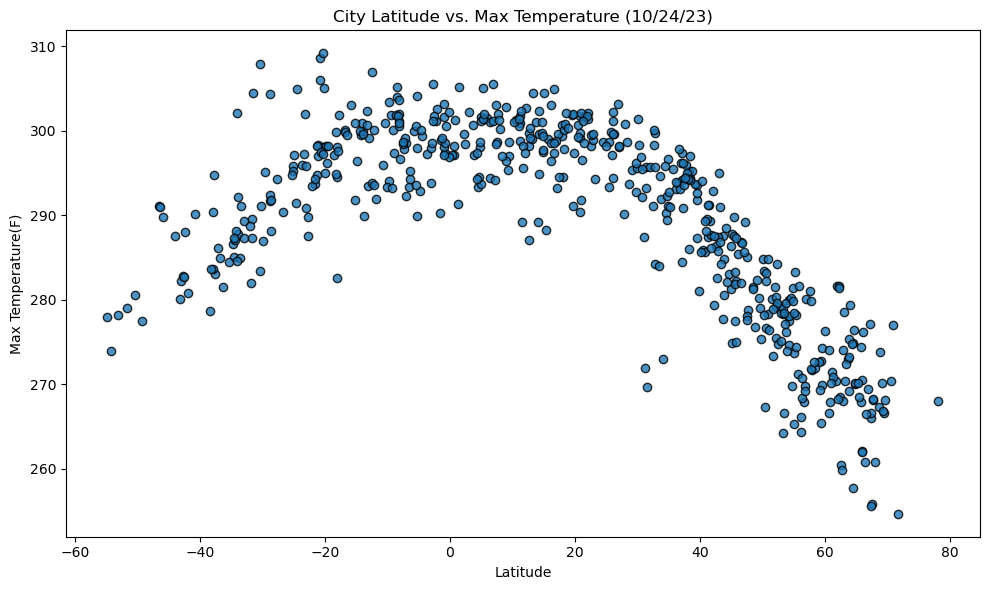

563


<Figure size 640x480 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature

#plt.scatter (lats, max_temps,edgecolor="black", linewidth=1, marker= 0, alpha= 0.8, label= "Cities" )

plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time. strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid= True
plt.tight_layout()
# Save the figure
plt.show()
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()








#### Latitude Vs. Humidity

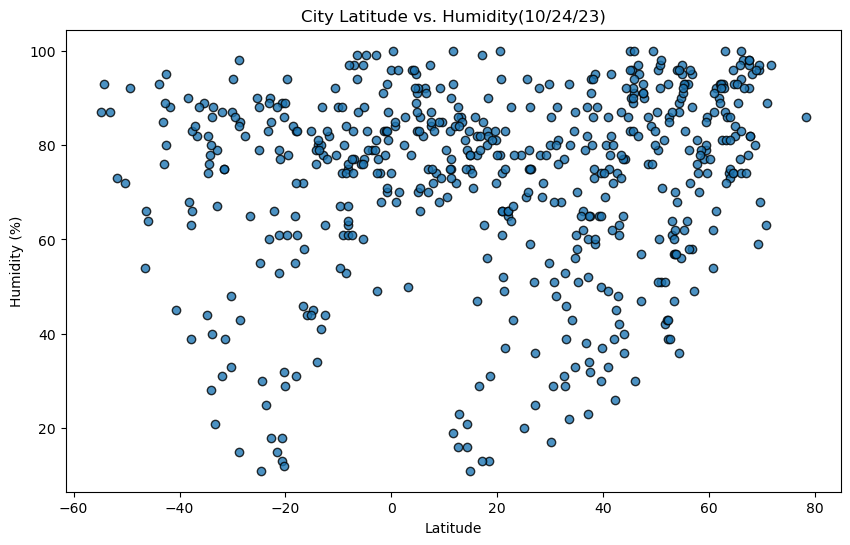

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)



# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid=True
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()
 



#### Latitude Vs. Cloudiness

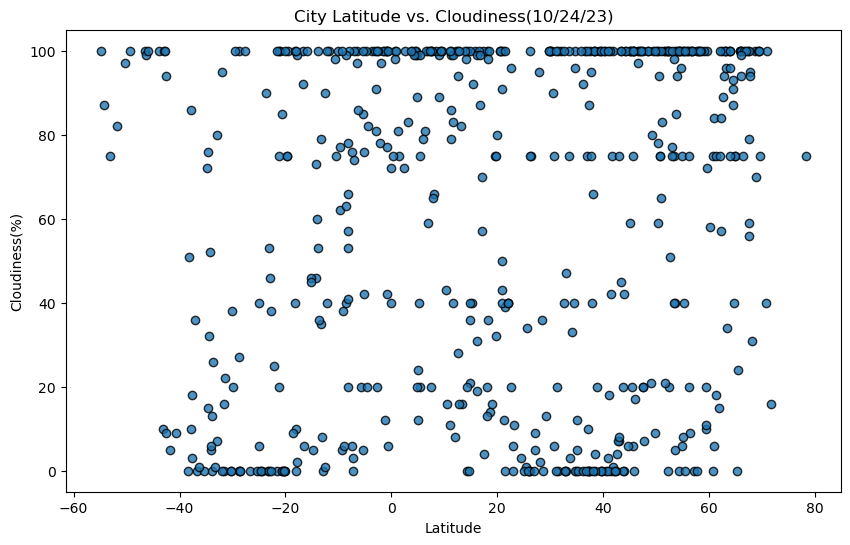

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid=True
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

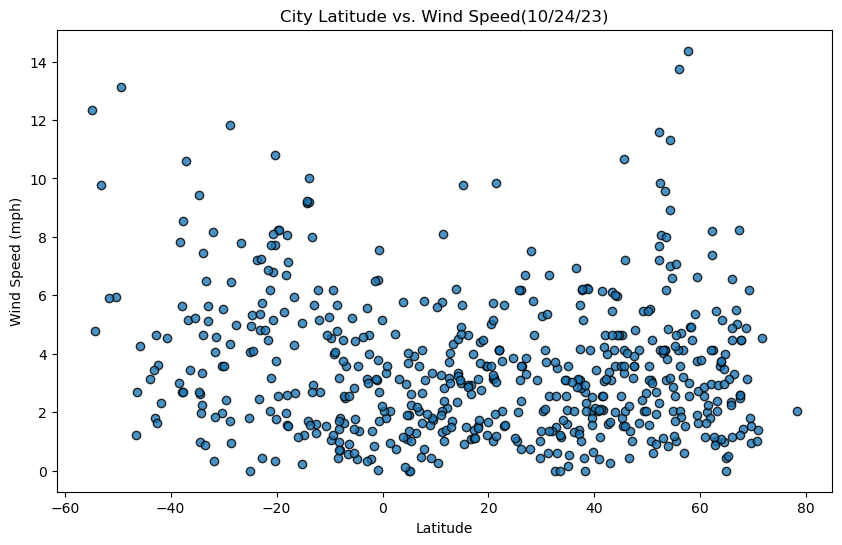

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid=True
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


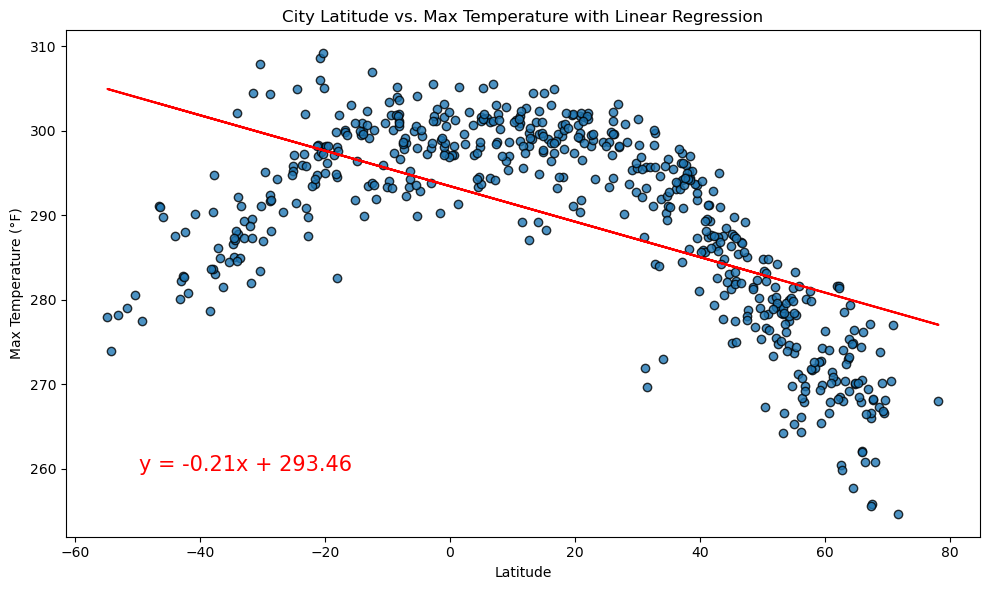

In [12]:

# Compute linear regression for latitude vs. max temperature
slope, intercept, r_value, p_value, std_err = linregress(city_data_df['Lat'], city_data_df['Max Temp'])
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8)
plt.plot(city_data_df['Lat'], slope * city_data_df['Lat'] + intercept, "r-")
plt.title('City Latitude vs. Max Temperature with Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.annotate(line_eq, (min(city_data_df['Lat'])+5, min(city_data_df['Max Temp'])+5), fontsize=15, color="red")
plt.grid=True

# Display the plot
plt.tight_layout()
plt.savefig("output_data/Latitude_vs_Temperature_Regression.png")  # Save the figure if you want
plt.show()


In [45]:
# Define a function to create Linear Regression plots
def LinearRegressionplots(df, COLUMN):   


    # Compute linear regression for latitude vs. max temperature
    slope, intercept, r_value, p_value, std_err = linregress(df['Lat'], df[COLUMN])
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create scatter plot
    plt.figure(figsize=(10,6))
    plt.scatter(df['Lat'], df[COLUMN], edgecolor='black', linewidths=1, marker='o', alpha=0.8)
    plt.plot(df['Lat'], slope * df['Lat'] + intercept, "r-")
    plt.title(f'City Latitude vs. {COLUMN} with Linear Regression')
    plt.xlabel('Latitude')
    plt.ylabel(COLUMN)
    plt.annotate(line_eq, (min(df['Lat'])+5, min(df[COLUMN])+5), fontsize=15, color="red")
    plt.grid=True

    # Display the plot
    plt.tight_layout()
    plt.savefig(f"output_data/Latitude_vs_{COLUMN.replace(' ','_')}_Regression.png") 
    plt.show()
    print(" the r-value is:", r_value)


In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df.head()
northern_hemi_df= city_data_df[city_data_df['Lat'] >= 0]
     

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,tiksi,71.6872,128.8694,254.66,97,16,4.53,RU,1698197246
6,lompoc,34.6391,-120.4579,290.25,87,100,3.09,US,1698197246
7,celestun,20.8667,-90.4000,301.76,74,50,5.74,MX,1698197246
8,hotan,37.0997,79.9269,284.42,23,0,1.38,CN,1698197246
10,carbonear,47.7332,-53.2148,278.77,90,7,4.82,CA,1698197247


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,291.08,54,100,1.23,NZ,1698197244
1,waitangi,-43.9535,-176.5597,287.49,93,100,3.13,NZ,1698197245
2,bredasdorp,-34.5322,20.0403,285.01,82,15,0.97,ZA,1698197245
3,grytviken,-54.2811,-36.5092,273.97,93,87,4.78,GS,1698197245
4,port elizabeth,-33.9180,25.5701,287.77,86,0,4.63,ZA,1698197245


###  Temperature vs. Latitude Linear Regression Plot

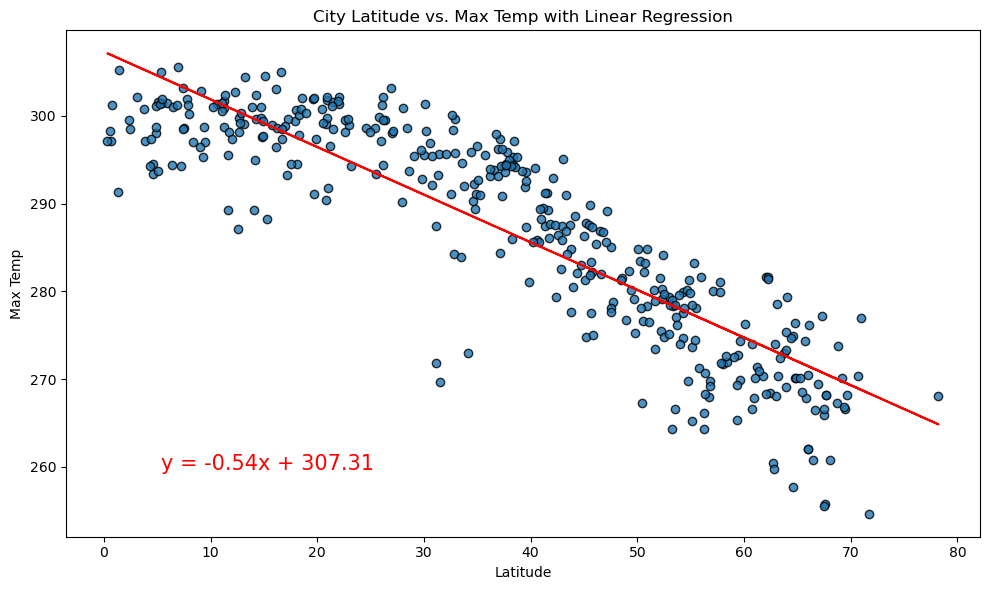

 the r-value is: -0.8793361320225835


In [48]:
# Linear regression on Northern Hemisphere

LinearRegressionplots(northern_hemi_df, 'Max Temp')


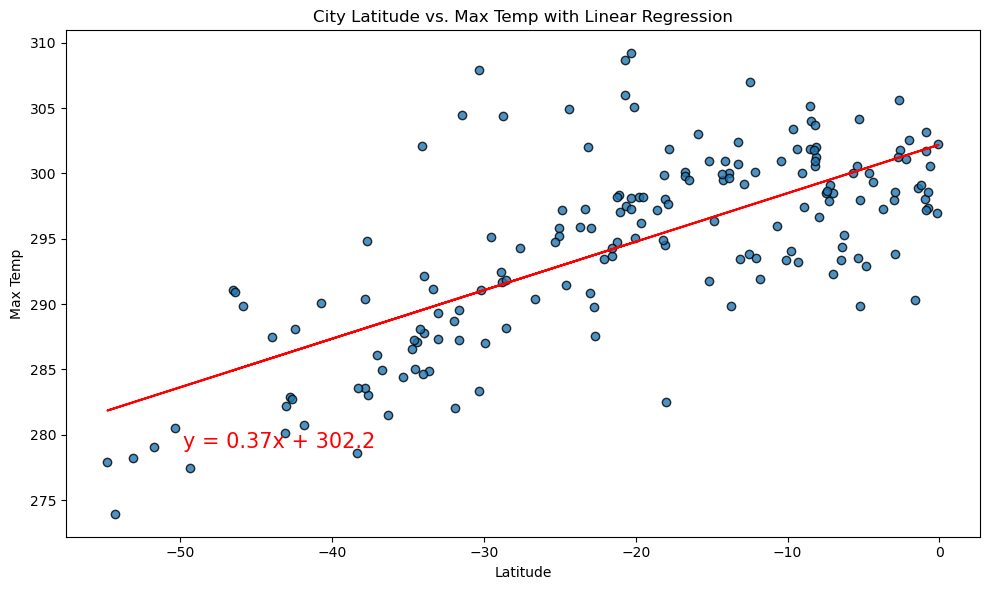

 the r-value is: 0.7114873702652494


In [38]:
# Linear regression on Southern Hemisphere
LinearRegressionplots(southern_hemi_df, 'Max Temp')


**Discussion about the linear relationship:** In the northern Hemisphere, as the latitude increases (moving away from the equator and closer to the north pole), the temperature decreases, indicating a strong negative correlation. In the southern hemisphere, however, as the latitude decreases (moving away from equator and closer to the south pole), the temperature decreases, thus reflecting a strong positive correlation.  

### Humidity vs. Latitude Linear Regression Plot

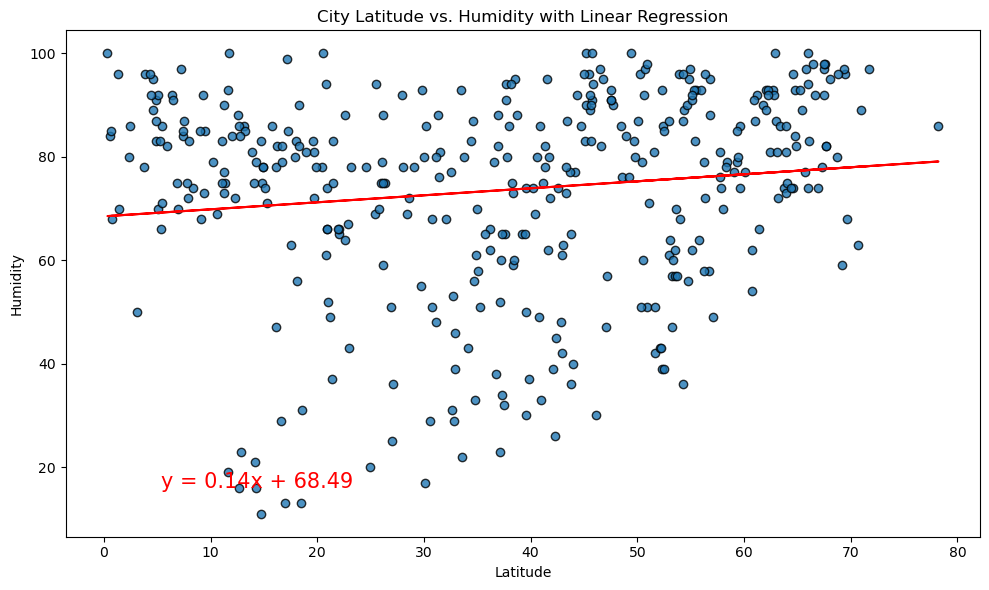

 the r-value is: 0.13460546067932413


In [39]:
# Northern Hemisphere
LinearRegressionplots(northern_hemi_df, 'Humidity')

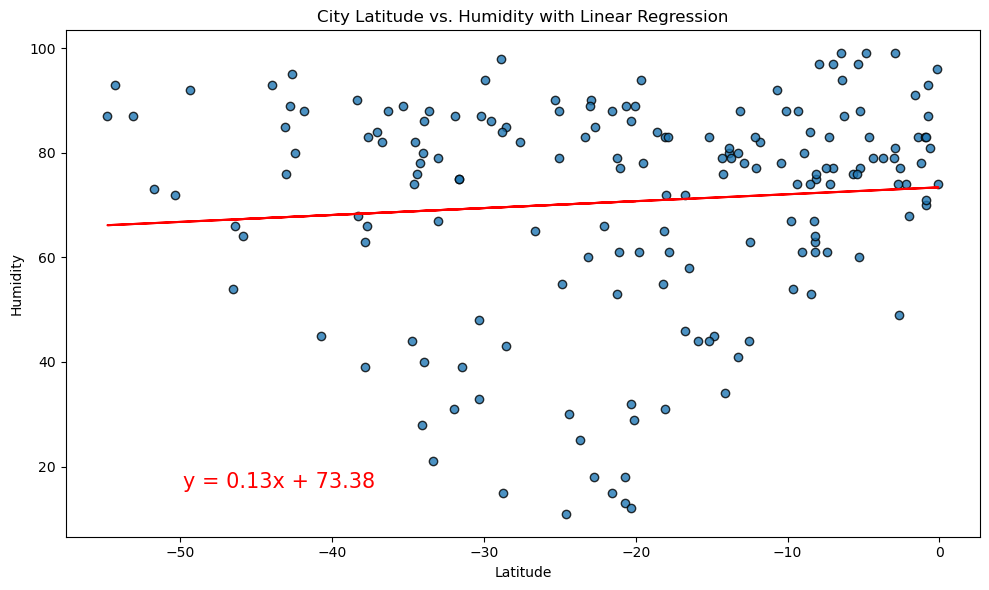

 the r-value is: 0.0872866761872598


In [40]:
# Southern Hemisphere
LinearRegressionplots(southern_hemi_df, 'Humidity')

**Discussion about the linear relationship:** there is no consistant correlation between the city latitude and humidity in the nothern and southern hemispheres. r-values in both graph are close to 0.  

### Cloudiness vs. Latitude Linear Regression Plot

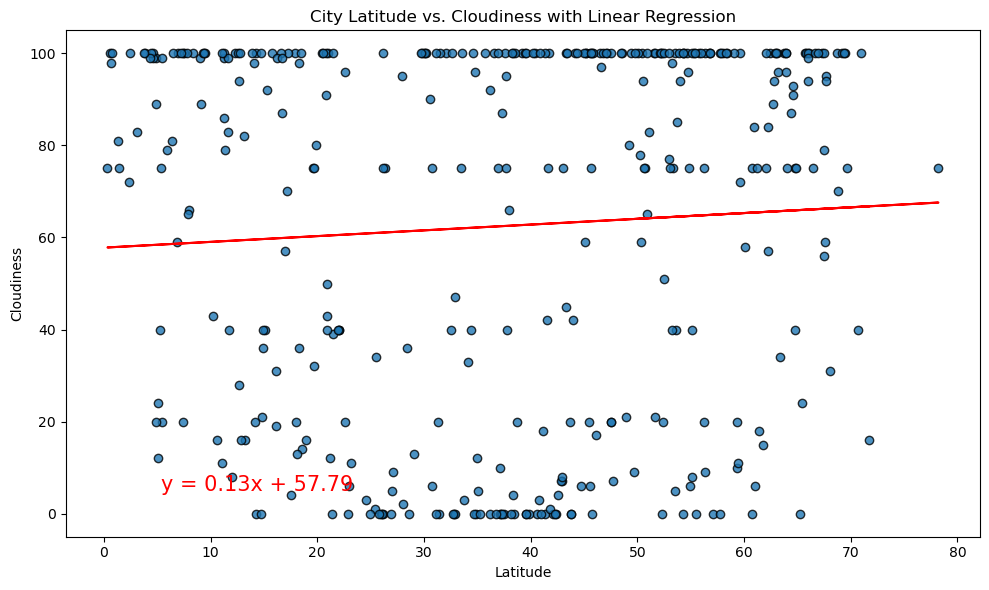

 the r-value is: 0.06200365905325191


In [41]:
# Northern Hemisphere
LinearRegressionplots(northern_hemi_df, 'Cloudiness')

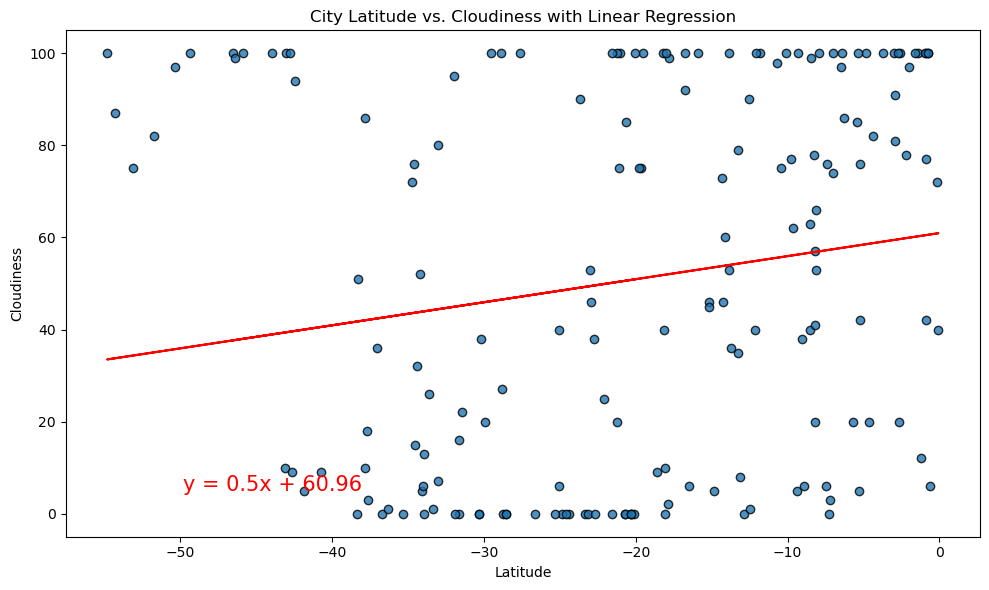

 the r-value is: 0.17238002625714402


In [42]:
# Southern Hemisphere
LinearRegressionplots(southern_hemi_df, 'Cloudiness')

**Discussion about the linear relationship:** There is no consistent linear correlation between city latitude and cloudiness in the northern and southern hemispheres. the r-value in both is close to 0.  

### Wind Speed vs. Latitude Linear Regression Plot

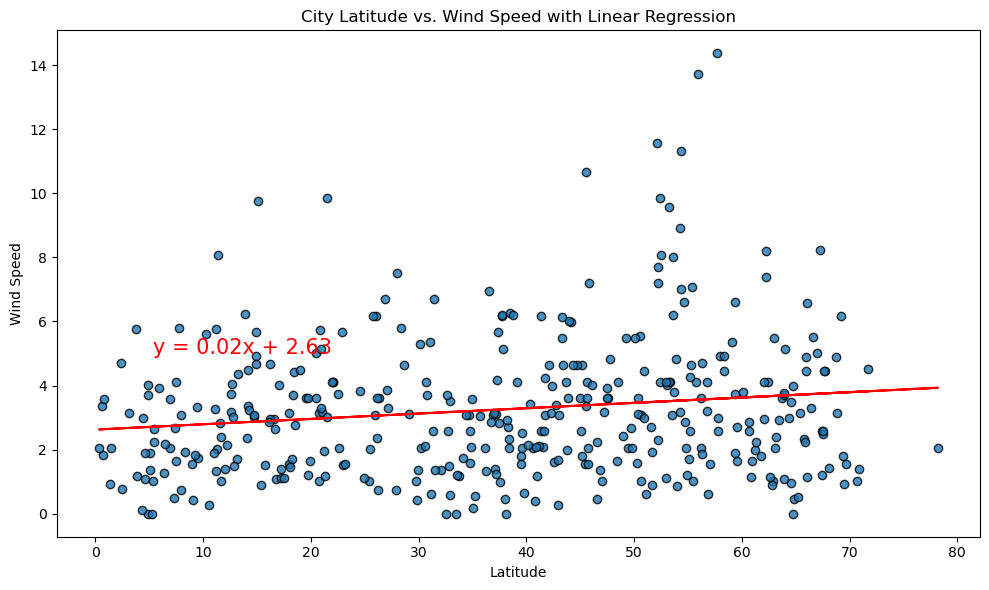

 the r-value is: 0.1509274002469925


In [43]:
# Northern Hemisphere
LinearRegressionplots(northern_hemi_df, 'Wind Speed')

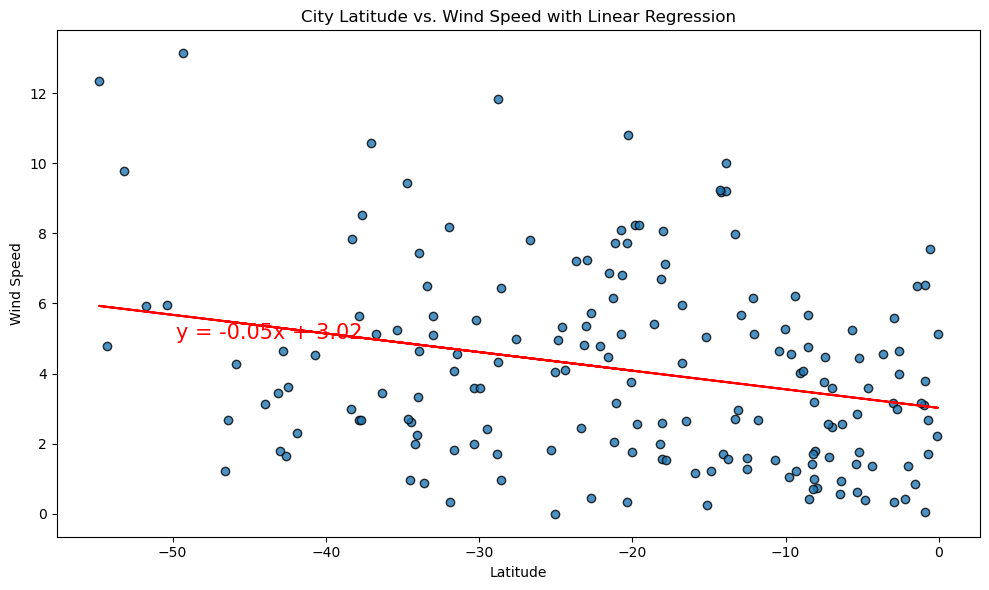

 the r-value is: -0.26960867868482447


In [44]:
# Southern Hemisphere
LinearRegressionplots(southern_hemi_df, 'Wind Speed')

**Discussion about the linear relationship:** there is no strong correlation between city latitude and wind speed in the northern and southern hemispheres. 